<a href="https://colab.research.google.com/github/plaban1981/DL_guided_Project/blob/main/mathematical_building_blocks_of_neural_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## import tensorflow

In [1]:
import tensorflow as tf
tf.__version__

'2.6.0'

## Load MNIST dataset

In [2]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
train_images.shape,test_images.shape

((60000, 28, 28), (10000, 28, 28))

## Build a Neural Network

In [4]:
model = tf.keras.Sequential(
    [tf.keras.layers.Dense(512,activation='relu'),
     tf.keras.layers.Dense(10,activation='softmax')]
)

## Compile the model

In [5]:
model.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

## Prepare the images

In [6]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

## Fit the trained model

In [8]:
history = model.fit(train_images,train_labels,epochs=5,batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0346 - accuracy: 0.9907
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0277 - accuracy: 0.9925
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0236 - accuracy: 0.9934
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0193 - accuracy: 0.9950
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0160 - accuracy: 0.9956


## Train the model and Evaluate on test data

In [33]:
history = model.fit(train_images,
                    train_labels,
                    validation_data=(test_images,test_labels),
                    epochs=25,validation_batch_size=16,
                    batch_size=32)

Epoch 1/25
1875/1875 [==============================] - 5s 3ms/step - loss: 8.9539e-04 - accuracy: 0.9997 - val_loss: 0.1550 - val_accuracy: 0.9836
Epoch 2/25
1875/1875 [==============================] - 5s 3ms/step - loss: 7.7054e-04 - accuracy: 0.9998 - val_loss: 0.1630 - val_accuracy: 0.9828
Epoch 3/25
1875/1875 [==============================] - 5s 3ms/step - loss: 9.7695e-04 - accuracy: 0.9997 - val_loss: 0.1874 - val_accuracy: 0.9801
Epoch 4/25
1875/1875 [==============================] - 5s 3ms/step - loss: 7.7235e-04 - accuracy: 0.9997 - val_loss: 0.1636 - val_accuracy: 0.9820
Epoch 5/25
1875/1875 [==============================] - 5s 3ms/step - loss: 5.9881e-04 - accuracy: 0.9998 - val_loss: 0.1781 - val_accuracy: 0.9821
Epoch 6/25
1875/1875 [==============================] - 5s 3ms/step - loss: 5.3807e-04 - accuracy: 0.9998 - val_loss: 0.1658 - val_accuracy: 0.9835
Epoch 7/25
1875/1875 [==============================] - 5s 3ms/step - loss: 3.7595e-04 - accuracy: 0.9999 - val_

In [21]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

## Visualize Accuracy and Loss

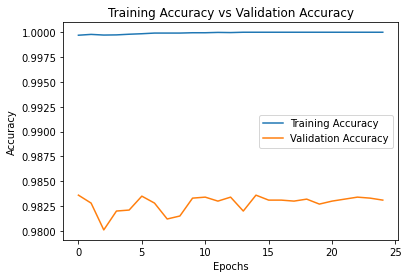

In [34]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],label='Training Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.title('Training Accuracy vs Validation Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

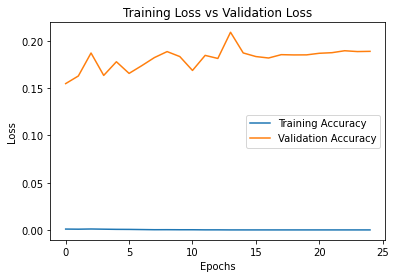

In [35]:
plt.plot(history.history['loss'],label='Training Accuracy')
plt.plot(history.history['val_loss'],label='Validation Accuracy')
plt.title('Training Loss vs Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

## Using the model to make predictions

In [14]:
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[0]

array([4.7264680e-20, 9.9012914e-27, 1.7558967e-17, 9.3142907e-12,
       6.1824490e-26, 8.4552773e-18, 1.3091780e-34, 1.0000000e+00,
       2.7882943e-20, 3.5884832e-14], dtype=float32)

## Predictions made by model on 1st test data

In [15]:
predictions[0].argmax()

7

## Actual Label

In [16]:
test_labels[0]

7

## Evaluating the model on new data

In [36]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

313/313 [==============================] - 1s 2ms/step - loss: 0.1891 - accuracy: 0.9831
test_acc: 0.9830999970436096


## Data representations for neural networks